# Invoking Foundational Models

code snippets from this section

In [2]:
#%pip install --upgrade --quiet pydantic-ai-slim[anthropic] anthropic

Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
from dotenv import load_dotenv
load_dotenv(".env")
assert os.environ["ANTHROPIC_API_KEY"][:2] == "sk",\
       "Please specify the ANTHROPIC_API_KEY access token in keys.env file"

## Invoke anthropic package directly

In [13]:
import anthropic

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ["ANTHROPIC_API_KEY"],
)

completion = client.messages.create(
    # model="claude-3-7-sonnet-latest",
    model="claude-sonnet-4-20250514",
    system="You are an expert Python programmer.",
    max_tokens=1024,
    temperature=0.3,
    messages=[
        {
            "role": "user",
            "content": [
               {
                  "type": "text",
                  "text": "Write code to find the median of a list of integers."
               }
            ]
        }
    ]
)

print(completion.content[0].text)

Here are several ways to find the median of a list of integers in Python:

## Method 1: Using Built-in `statistics.median()`
```python
import statistics

def find_median_builtin(numbers):
    """Find median using Python's built-in statistics module."""
    if not numbers:
        raise ValueError("List cannot be empty")
    return statistics.median(numbers)

# Example usage
numbers = [3, 1, 4, 1, 5, 9, 2, 6]
print(f"Median: {find_median_builtin(numbers)}")  # Output: 3.5
```

## Method 2: Manual Implementation
```python
def find_median(numbers):
    """Find median by manually sorting and calculating."""
    if not numbers:
        raise ValueError("List cannot be empty")
    
    # Sort the list
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    
    # If odd number of elements, return middle element
    if n % 2 == 1:
        return sorted_numbers[n // 2]
    # If even number of elements, return average of two middle elements
    else:
        mid1 = sorted_numbers[n

## Anthropic through PydanticAI

In [14]:
# Needed in Jupyter environment See: https://ai.pydantic.dev/troubleshooting/ 
import nest_asyncio
nest_asyncio.apply()

In [15]:
from pydantic_ai import Agent
# Refer - https://ai.pydantic.dev/models/anthropic/
# https://ai.pydantic.dev/api/models/base/#pydantic_ai.models.KnownModelName
agent = Agent('anthropic:claude-sonnet-4-20250514',
              system_prompt="You are an expert Python programmer.")

result = agent.run_sync("Write code to find the median of a list of integers.")
print(result.output)


Here are several ways to find the median of a list of integers in Python:

## Method 1: Using Built-in `statistics.median()`
```python
import statistics

def find_median_builtin(numbers):
    """Find median using Python's built-in statistics module."""
    if not numbers:
        raise ValueError("List cannot be empty")
    return statistics.median(numbers)

# Example usage
numbers = [3, 1, 4, 1, 5, 9, 2, 6, 5]
print(f"Median: {find_median_builtin(numbers)}")  # Output: 4
```

## Method 2: Manual Implementation
```python
def find_median(numbers):
    """Find median by manually implementing the algorithm."""
    if not numbers:
        raise ValueError("List cannot be empty")
    
    # Sort the list
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    
    # If odd number of elements, return middle element
    if n % 2 == 1:
        return sorted_numbers[n // 2]
    # If even number of elements, return average of two middle elements
    else:
        mid1 = sorted_numbe

## Ollama API Example
- ollama run llama3.2:1b

In [11]:
# Run ollama run llama3.2:1b using pydantic-ai-slim
from pydantic_ai.models.openai import OpenAIModel
from pydantic_ai.providers.openai import OpenAIProvider

model = OpenAIModel(model_name="llama3.2:1b",
                    provider=OpenAIProvider(base_url="http://localhost:11434/v1"))
agent_ollama = Agent(model,
                      system_prompt="You are an expert Python programmer.")
result_ollama = agent_ollama.run_sync("Write code to find the min, max, and average of a list of integers.")
print(result_ollama.output) 


Here's an example function in Python that calculates the minimum, maximum, and average of a list of integers:

```python
def calculate_statistics(numbers):
    """
    Calculate the minimum, maximum, and average of a list of integers.

    Args:
        numbers (list): A list of integers.

    Returns:
        tuple: A tuple containing the minimum, maximum, and average values.
    """

    # Check if the input has at least two elements
    if len(numbers) < 2:
        raise ValueError("A list with less than two elements is required.")

    # Initialize the minimum, maximum, and sum with the first element of the list
    min_num = max_num = numbers[0]
    total_sum = numbers[0]

    # Iterate over the rest of the list to find the minimum, maximum, and sum
    for num in numbers[1:]:
        if num < min_num:
            min_num = num
        elif num > max_num:
            max_num = num

        # Update the sum and minimum or maximum value as needed
        total_sum += num

    # Calc

In [12]:
def calculate_statistics(numbers):
    """
    Calculate the minimum, maximum, and average of a list of integers.

    Args:
        numbers (list): A list of integers.

    Returns:
        tuple: A tuple containing the minimum, maximum, and average values.
    """

    # Check if the input has at least two elements
    if len(numbers) < 2:
        raise ValueError("A list with less than two elements is required.")

    # Initialize the minimum, maximum, and sum with the first element of the list
    min_num = max_num = numbers[0]
    total_sum = numbers[0]

    # Iterate over the rest of the list to find the minimum, maximum, and sum
    for num in numbers[1:]:
        if num < min_num:
            min_num = num
        elif num > max_num:
            max_num = num

        # Update the sum and minimum or maximum value as needed
        total_sum += num

    # Calculate the average by dividing the sum by the number of elements
    avg = total_sum / len(numbers)

    return min_num, max_num, avg


# Example usage:
numbers = [12, 45, 7, 23, 56, 89]
min_val, max_val, avg_val = calculate_statistics(numbers)
print(f"Minimum: {min_val}")
print(f"Maximum: {max_val}")
print(f"Average: {avg_val}")

Minimum: 7
Maximum: 89
Average: 38.666666666666664


## Softmax

graphs

In [3]:
logits = {
    "the": 5.2,
    "a": 3.8,
    "an": 2.1,
    "this": 1.5,
    "that": 0.9
}

In [4]:
logits2 = {
    "had": 3.0,
    "did": 2.9,
    "was": 2.8,
    "ate": 1.5,
    "ran": 1.4
}

In [5]:
import numpy as np

def logits_to_probs(logits):
    probs = { word: np.exp(logit) for word, logit in logits.items() }
    sigma = np.sum(list(probs.values()))
    probs = { word: value/sigma for word, value in probs.items() }
    return probs

probs = logits_to_probs(logits)
probs

{'the': np.float64(0.7519146085415931),
 'a': np.float64(0.1854198596096983),
 'an': np.float64(0.033873153382863015),
 'this': np.float64(0.018589980727712955),
 'that': np.float64(0.010202397738132567)}

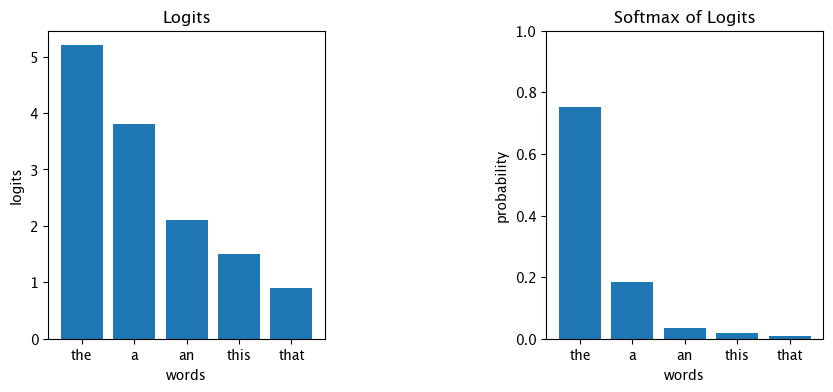

In [7]:
import matplotlib.pyplot as plt

def plot_bar_graph(ax, data_dict, title, xlabel, ylabel, is_prob=True):
  categories = list(data_dict.keys())
  values = list(data_dict.values())
  ax.bar(categories, values)
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  if is_prob:
    ax.set_ylim(0,1)

nrows=1
ncols=2
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
plt.subplots_adjust(wspace=0.8, hspace=0.4)
plot_bar_graph(axes[0], logits, "Logits", "words", "logits", is_prob=False)
plot_bar_graph(axes[1], probs, "Softmax of Logits", "words", "probability")

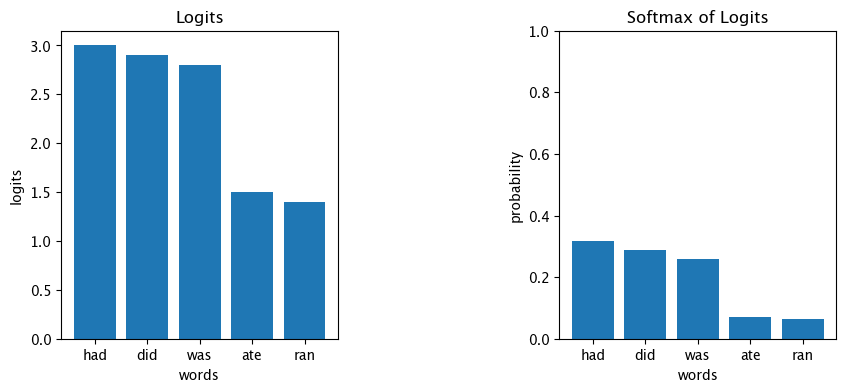

In [8]:
nrows=1
ncols=2
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
plt.subplots_adjust(wspace=0.8, hspace=0.4)
plot_bar_graph(axes[0], logits2, "Logits", "words", "logits", is_prob=False)
plot_bar_graph(axes[1], logits_to_probs(logits2), "Softmax of Logits", "words", "probability")

## Temperature

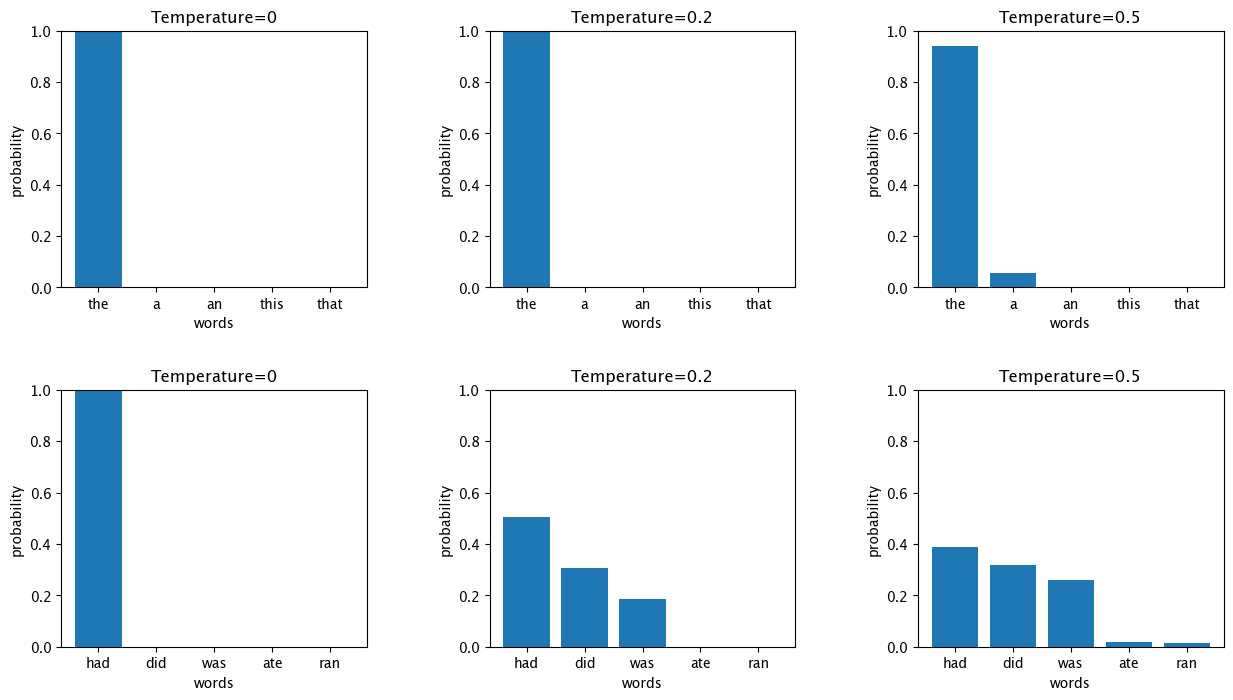

In [9]:
def scale_logits(logits, T):
    return { word: logit/T for word, logit in logits.items() }
nrows=2
ncols=3
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plot_bar_graph(axes[0,0], logits_to_probs(scale_logits(logits, 0.01)),
               "Temperature=0", "words", "probability")
plot_bar_graph(axes[0,1], logits_to_probs(scale_logits(logits, 0.2)),
               "Temperature=0.2", "words", "probability")
plot_bar_graph(axes[0,2], logits_to_probs(scale_logits(logits, 0.5)),
               "Temperature=0.5", "words", "probability")

plot_bar_graph(axes[1,0], logits_to_probs(scale_logits(logits2, 0.01)),
               "Temperature=0", "words", "probability")
plot_bar_graph(axes[1,1], logits_to_probs(scale_logits(logits2, 0.2)),
               "Temperature=0.2", "words", "probability")
plot_bar_graph(axes[1,2], logits_to_probs(scale_logits(logits2, 0.5)),
               "Temperature=0.5", "words", "probability")

In [19]:
for T in [0, 0.2, 0.5, 0.8, 1.0]:
    print("------------")
    agent = Agent('anthropic:claude-sonnet-4-20250514', model_settings={
        "temperature": T
    }, system_prompt="Complete the sentence.")
    result = agent.run_sync("Generally trade war in history causes...")
    print(T, ":  ", result.output)
    print("------------")

------------
0 :   Generally, trade wars in history cause:

**Economic harm to all parties involved**, including:

- **Reduced international trade** and economic efficiency
- **Higher prices for consumers** due to tariffs and trade barriers
- **Job losses** in export-dependent industries
- **Slower economic growth** and reduced productivity
- **Supply chain disruptions** and increased business uncertainty

**Historical examples** like the Smoot-Hawley Tariff Act of 1930 worsened the Great Depression, while more recent trade disputes have led to retaliatory measures that hurt farmers, manufacturers, and consumers on multiple sides.

**Additional consequences** often include:
- Strained diplomatic relationships
- Reduced global cooperation
- Disproportionate impact on smaller economies
- Innovation slowdowns due to reduced competition

While proponents may argue trade wars protect domestic industries in the short term, economic research consistently shows that the overall costs typically

Task was destroyed but it is pending!
task: <Task pending name='Task-49' coro=<_async_in_context.<locals>.run_in_context() done, defined at /Users/mahtabsyed/Documents/VSCode Cursor/Generative AI Design Patterns/.venv/lib/python3.11/site-packages/ipykernel/utils.py:57> wait_for=<Task pending name='Task-50' coro=<Kernel.shell_main() running at /Users/mahtabsyed/Documents/VSCode Cursor/Generative AI Design Patterns/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:590> cb=[Task.__wakeup()]> cb=[ZMQStream._run_callback.<locals>._log_error() at /Users/mahtabsyed/Documents/VSCode Cursor/Generative AI Design Patterns/.venv/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py:563]>
/Users/mahtabsyed/.local/share/uv/python/cpython-3.11.8-macos-aarch64-none/lib/python3.11/asyncio/tasks.py:39: RuntimeWarning: coroutine 'Kernel.shell_main' was never awaited
  return _current_tasks.get(loop)
Task was destroyed but it is pending!
task: <Task pending name='Task-50' coro=<Kernel.shell_mai

0.8 :   Generally, trade wars in history cause:

**Economic harm to all parties involved**, including:

- **Reduced international trade** and economic efficiency
- **Higher consumer prices** due to tariffs and import restrictions
- **Retaliatory measures** that escalate tensions
- **Slower economic growth** and potential recession
- **Job losses** in export-dependent industries
- **Disrupted supply chains** and increased business uncertainty

**Historical examples** like the Smoot-Hawley Tariff Act of 1930 worsened the Great Depression, while more recent trade disputes have led to similar patterns of mutual economic damage.

**However**, the outcomes can vary depending on:
- The economic size and leverage of the countries involved
- Duration and scope of the trade restrictions
- Broader geopolitical context
- Domestic policy responses

While some argue trade wars can protect specific domestic industries in the short term, the historical consensus among economists is that they typically

Saved:
    <pre>
0 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries.
0.2 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries.
0.5 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses across multiple industries. Many manufacturers were forced to reconsider their production strategies, while farmers faced reduced export opportunities as retaliatory tariffs limited access to international markets. The long-term effects included accelerated efforts to diversify supply chains away from affected regions and renewed debates about the effectiveness of protectionist trade policies.
0.8 :   The trade war caused significant disruptions to global supply chains, forcing many companies to reconsider their manufacturing strategies and sourcing policies. It led to increased tariffs on imported goods, higher prices for consumers, and economic uncertainty in affected industries. Several businesses reported decreased profits as they absorbed additional costs or lost market share in foreign markets. The prolonged tension also contributed to volatility in financial markets and complicated diplomatic relations between the involved nations.
1.0 :   The trade war caused significant disruptions to global supply chains, leading to increased prices for consumers and economic uncertainty for businesses in affected industries. Many manufacturers were forced to reconsider their sourcing strategies, while farmers in certain regions faced reduced export opportunities and falling commodity prices. The long-term impacts included accelerated shifts in international trade patterns and renewed debates about economic nationalism versus globalization.    
    </pre>

In [53]:
for top_k in [1, 10, 100]:
    agent = Agent('anthropic:claude-3-7-sonnet-latest', model_settings={
        "temperature": 0.95,
        "top_k": top_k
    }, system_prompt="Complete the sentence.")
    result = agent.run_sync("The spaceship")
    print(top_k, ":  ", result.data)

1 :   The spaceship zoomed through the vast expanse of space, its powerful engines glowing blue against the darkness as it carried its crew toward distant stars and unknown adventures.
10 :   The spaceship glided silently through the vast emptiness of space, its powerful engines propelled it toward the distant galaxy where no human had ventured before.
100 :   The spaceship soared through the starry expanse, its gleaming hull reflecting the distant light of alien suns as it carried its crew toward unexplored worlds beyond the edge of known space.


Saved:
    <pre>
1 :   The spaceship zoomed through the vast expanse of space, its powerful engines glowing blue against the darkness as it carried its crew toward distant stars and unknown adventures.
10 :   The spaceship glided silently through the vast emptiness of space, its powerful engines propelled it toward the distant galaxy where no human had ventured before.
100 :   The spaceship soared through the starry expanse, its gleaming hull reflecting the distant light of alien suns as it carried its crew toward unexplored worlds beyond the edge of known space.
    </pre>

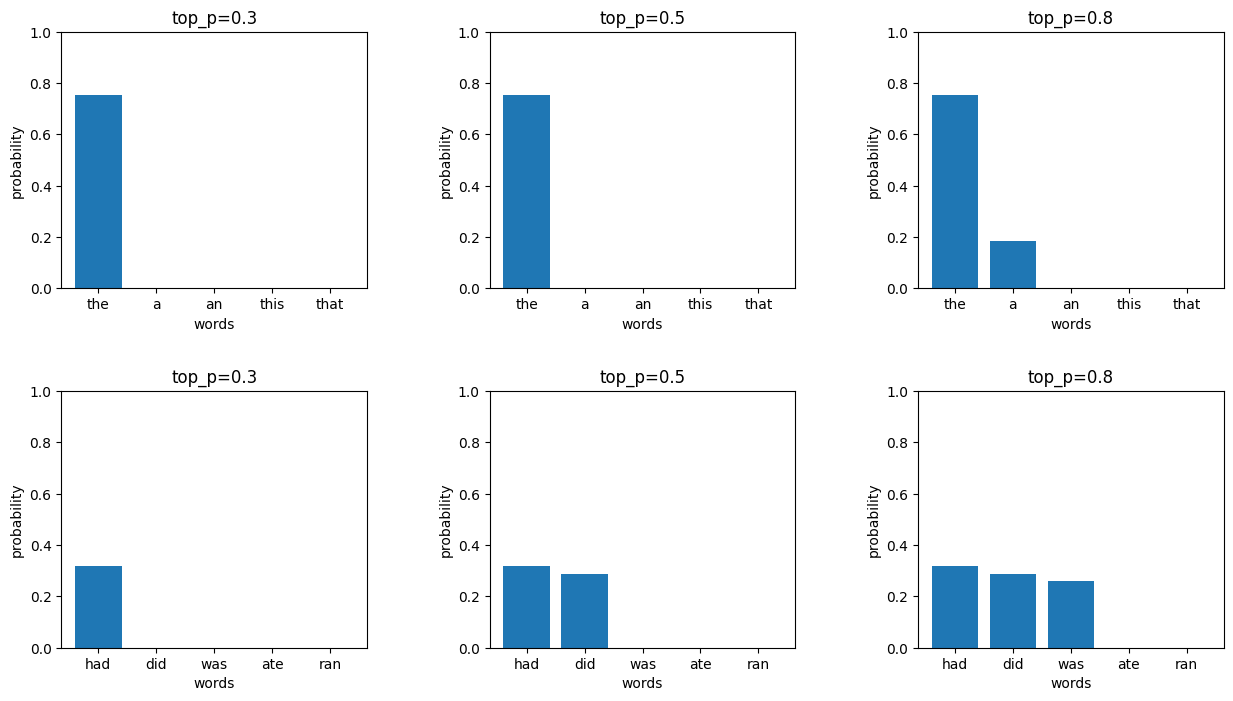

In [57]:
def apply_top_p(probs, top_p):
    # assumes the dict is sorted by value
    result = {}
    sum_so_far = 0
    for word, prob in probs.items():
        if sum_so_far < top_p:
            result[word] = prob
        else:
            result[word] = 0
        sum_so_far += prob
    return result

nrows=2
ncols=3
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plot_bar_graph(axes[0,0], apply_top_p(logits_to_probs(logits), 0.3),
               "top_p=0.3", "words", "probability")
plot_bar_graph(axes[0,1], apply_top_p(logits_to_probs(logits), 0.5),
               "top_p=0.5", "words", "probability")
plot_bar_graph(axes[0,2], apply_top_p(logits_to_probs(logits), 0.8),
               "top_p=0.8", "words", "probability")

plot_bar_graph(axes[1,0], apply_top_p(logits_to_probs(logits2), 0.3),
               "top_p=0.3", "words", "probability")
plot_bar_graph(axes[1,1], apply_top_p(logits_to_probs(logits2), 0.5),
               "top_p=0.5", "words", "probability")
plot_bar_graph(axes[1,2], apply_top_p(logits_to_probs(logits2), 0.8),
               "top_p=0.8", "words", "probability")